In [1]:
import sys

In [2]:
sys.path.insert(0, "../../src/")

In [3]:
import analysis.common as ac
import analysis.power_drain_manual as ap

In [4]:
reload(ap)

<module 'analysis.power_drain_manual' from '../../src/analysis/power_drain_manual.pyc'>

In [5]:
(iphone_ids, android_ids, phone_labels) = ac.setupPaths()

In [6]:
import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt

In [7]:
display_names = [ac.get_display_name(label) for label in phone_labels]

In [8]:
drain_df_map = {}

In [9]:
drain_df_map["ios.1"] = pd.read_csv("../../results_dec_2015/ucb.sdb.ios.1/power_logs/noha5m_1449240600.log")
drain_df_map["ios.2"] = pd.read_csv("../../results_dec_2015/ucb.sdb.ios.2/power_logs/noma5m_1449240600.log")
drain_df_map["ios.3"] = pd.read_csv("../../results_dec_2015/ucb.sdb.ios.3/power_logs/noma50m_1449240600.log")

In [10]:
drain_df_map["android.1"] = pd.read_csv("../../results_dec_2015/ucb.sdb.android.1/power_logs/noha2s_1449240600.log")
drain_df_map["android.2"] = pd.read_csv("../../results_dec_2015/ucb.sdb.android.2/power_logs/noma2s_1449240600.log")
drain_df_map["android.3"] = pd.read_csv("../../results_dec_2015/ucb.sdb.android.3/power_logs/noma30s_1449240600.log")

In [11]:
regime_map = {}

In [22]:
regime_map["ios.1"] = "hafs"
regime_map["ios.2"] = "mafs"
regime_map["ios.3"] = "mass"

In [23]:
regime_map["android.1"] = "hafs"
regime_map["android.2"] = "mafs"
regime_map["android.3"] = "mass"

In [24]:
for drain_df in drain_df_map.values():
    drain_df["fmt_time"] = drain_df.ts.map(lambda(t): pydt.datetime.fromtimestamp(t))

In [25]:
drain_df.head()

,key,ts,value,fmt_time
0,battery_level,1.449241e+09,100,2015-12-04 06:50:00.000
1,battery_level,1.449242e+09,100,2015-12-04 07:18:33.010
2,battery_level,1.449244e+09,100,2015-12-04 07:49:38.490
3,battery_level,1.449248e+09,98,2015-12-04 08:48:16.890
4,battery_level,1.449249e+09,97,2015-12-04 09:14:10.980


In [26]:
ground_truth_df = ap.get_ground_truth_df(drain_df, [[0,4,17,22,23], ["moving", "active", "moving", "passive"]])
ground_truth_df.to_csv("../../ground_truth/trip_to_berkeley.friday.2015-12-04/states.summary")

In [27]:
ground_truth_df

,start_index,start_ts,start_fmt_time,start_value,end_index,end_ts,end_fmt_time,end_value,state
0,0,1.449241e+09,2015-12-04 06:50:00.000,100,4,1.449249e+09,2015-12-04 09:14:10.980,97,moving
1,4,1.449249e+09,2015-12-04 09:14:10.980,97,17,1.449277e+09,2015-12-04 16:48:34.190,72,active
2,17,1.449277e+09,2015-12-04 16:48:34.190,72,22,1.449287e+09,2015-12-04 19:39:01.290,63,moving
3,22,1.449287e+09,2015-12-04 19:39:01.290,63,23,1.449328e+09,2015-12-05 07:03:22.210,41,passive


In [28]:
drain_df_map.keys()

['android.2', 'android.3', 'android.1', 'ios.1', 'ios.2', 'ios.3']

adding annotations for 0, 2015-12-04 06:50:00, 2015-12-04 09:14:10.980000
adding annotations for 1, 2015-12-04 09:14:10.980000, 2015-12-04 16:48:34.190000
adding annotations for 2, 2015-12-04 16:48:34.190000, 2015-12-04 19:39:01.290000
adding annotations for 3, 2015-12-04 19:39:01.290000, 2015-12-05 07:03:22.210000
adding annotations for 0, 2015-12-04 06:50:00, 2015-12-04 09:14:10.980000
adding annotations for 1, 2015-12-04 09:14:10.980000, 2015-12-04 16:48:34.190000
adding annotations for 2, 2015-12-04 16:48:34.190000, 2015-12-04 19:39:01.290000
adding annotations for 3, 2015-12-04 19:39:01.290000, 2015-12-05 07:03:22.210000


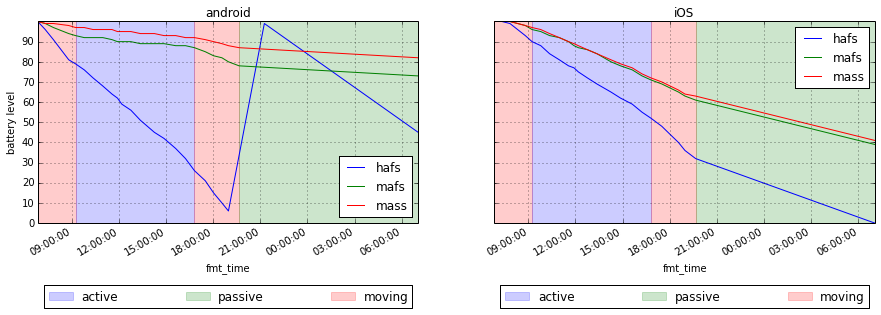

In [29]:
(fig, axes) = ap.display_drain_over_day(drain_df_map, ground_truth_df, regime_map)

displaying 0, android.1 (hafs)
displaying 1, android.2 (mafs)
displaying 2, android.3 (mass)
displaying 3, ios.1 (hafs)
displaying 4, ios.2 (mafs)
displaying 5, ios.3 (mass)


(<matplotlib.figure.Figure at 0x10b87ba50>,
 array([<matplotlib.axes.AxesSubplot object at 0x107910a50>,
        <matplotlib.axes.AxesSubplot object at 0x10a1e3ed0>], dtype=object))

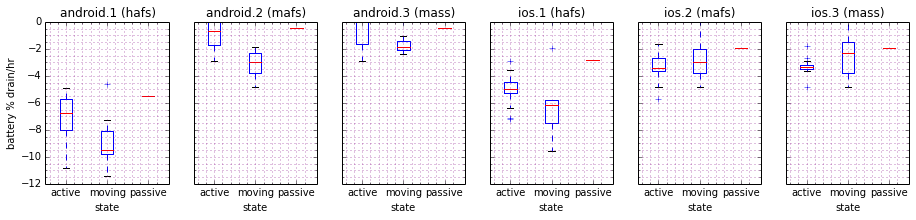

In [30]:
ap.display_per_state_drain(drain_df_map, ground_truth_df, regime_map)

In [21]:
state_diff_df_map = {}
for i, key in enumerate(sorted(drain_df_map.keys())):
    print "displaying %d, %s (%s)" % (i, key, regime_map[key])
    state_diff_df_map[key] = ap.get_state_diff_df(drain_df_map[key], ground_truth_df)
    print state_diff_df_map[key].groupby('state').rate.describe()

displaying 0, android.1 (ha2s)
state         
active   count    13.000000
         mean     -7.132685
         std       1.867182
         min     -10.853617
         25%      -7.999467
         50%      -6.719803
         75%      -5.738744
         max      -4.925165
moving   count     8.000000
         mean     -8.822846
         std       2.086489
         min     -11.408109
         25%      -9.794724
         50%      -9.499399
         75%      -8.118630
         max      -4.632936
passive  count     1.000000
         mean     -5.511918
         std            NaN
         min      -5.511918
         25%      -5.511918
         50%      -5.511918
         75%      -5.511918
         max      -5.511918
dtype: float64
displaying 1, android.2 (ma2s)
state         
active   count    12.000000
         mean     -0.926580
         std       1.030067
         min      -2.869372
         25%      -1.717881
         50%      -0.671527
         75%       0.000000
         max       0.0000